**Import the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import cv2
from google.colab.patches import cv2_imshow

**Loading Dataset**

In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [3]:
# Shape and image output is gray scale
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
#print image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [5]:
print(X_train[10].shape)

(28, 28)


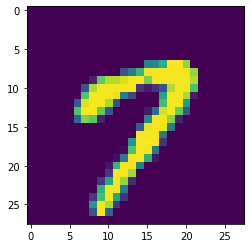

7

In [6]:
#Display the image
plt.imshow(X_train[15])
plt.show()
#print also label
Y_train[15]

In [7]:
#unique value
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Encoding**

In [8]:
#Scaling
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Build Neural Network**

In [10]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                           keras.layers.Dense(50, activation = 'relu'),
                           keras.layers.Dense(10, activation = 'sigmoid')
])

**Compile NN**

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#training the NN
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Training data accuracy 98.9%

**Test ACCURACY**

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)
accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710


0.9710000157356262

Testing data accuracy 97.1%

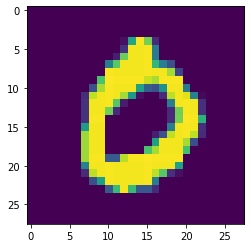

In [14]:
#X_test data point
plt.imshow(X_test[3])
plt.show()

In [15]:
Y_test[3]

0

In [16]:
Y_pred = model.predict(X_test)
Y_pred.shape

(10000, 10)

In [17]:
Y_pred[3]

array([9.9999857e-01, 6.3994070e-05, 9.5563197e-01, 4.7509968e-03,
       5.3725803e-01, 1.3602376e-03, 9.2175573e-01, 8.9567065e-02,
       1.0700226e-03, 1.2485087e-03], dtype=float32)

**The prediction of probability of each class for that data point**

In [18]:
label_first_image = np.argmax(Y_pred[3])
label_first_image

0

**The prediction of probability all test**

In [19]:
Y_pred

array([[3.5130084e-03, 6.7106444e-01, 6.6638464e-01, ..., 9.9999774e-01,
        1.3417095e-02, 6.5949798e-02],
       [1.4623702e-03, 9.8551810e-01, 9.9999803e-01, ..., 8.7179070e-10,
        9.9594283e-01, 2.8698874e-09],
       [3.2803416e-04, 9.9889880e-01, 1.9822419e-02, ..., 1.7416507e-02,
        8.2349467e-01, 3.1207800e-03],
       ...,
       [7.6076623e-07, 2.1074546e-05, 1.1165320e-04, ..., 5.3507298e-02,
        2.6697814e-03, 5.0617886e-01],
       [3.9582705e-05, 3.1402707e-04, 3.5408437e-03, ..., 6.9005787e-03,
        9.9133873e-01, 6.4516068e-04],
       [1.0095924e-02, 1.2965620e-02, 4.6259880e-02, ..., 3.3845839e-07,
        1.4659762e-04, 5.2905436e-10]], dtype=float32)

In [20]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

**Confusion Matrix**

In [21]:
con_mat = confusion_matrix(Y_test, Y_pred_labels)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    1,    0,    1,    1,    2,    2,    3,    0],
       [   0, 1122,    1,    2,    0,    4,    2,    0,    4,    0],
       [   5,    0,  999,    1,    7,    1,    2,    6,   11,    0],
       [   0,    0,    5,  966,    0,   23,    0,    3,    7,    6],
       [   0,    0,    2,    0,  968,    1,    4,    2,    1,    4],
       [   2,    0,    0,    4,    2,  878,    4,    1,    1,    0],
       [   6,    1,    0,    0,    8,   11,  929,    0,    3,    0],
       [   1,    5,    9,    0,    5,    0,    0,  994,    8,    6],
       [   2,    0,    3,    6,    6,   10,    2,    2,  943,    0],
       [   3,    4,    0,    8,   24,   10,    1,    7,   10,  942]],
      dtype=int32)>

**Heatmap**

Text(0.5, 69.0, 'Predicted')

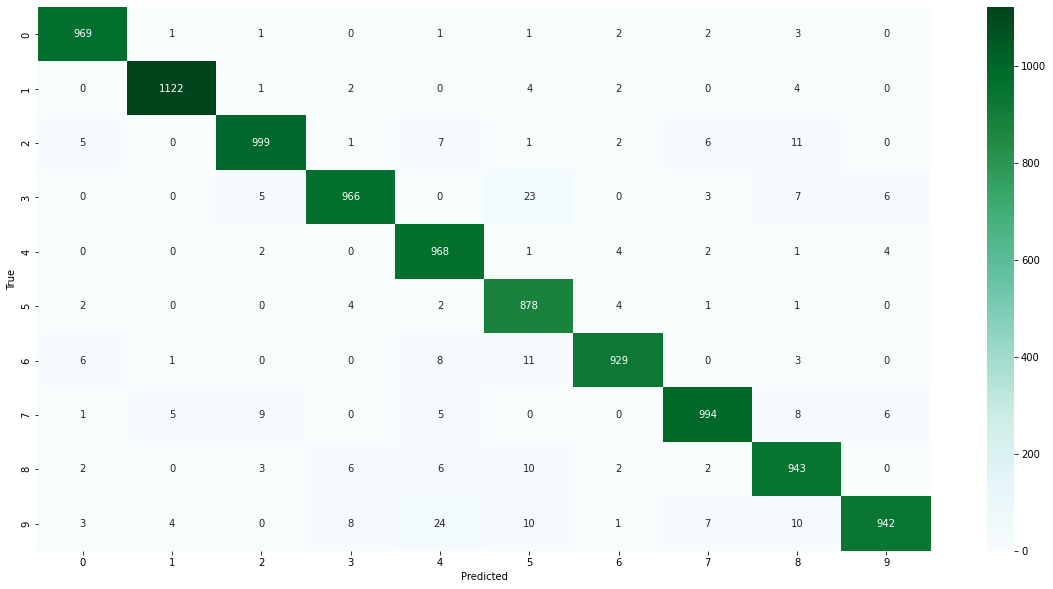

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuGn')
plt.ylabel('True')
plt.xlabel('Predicted')

**Single predictive system with input image**

In [23]:
image_path = '/content/MNIST_digit.png'
input_test_image = cv2.imread(image_path)

In [24]:
type(input_test_image)

numpy.ndarray

In [25]:
input_test_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

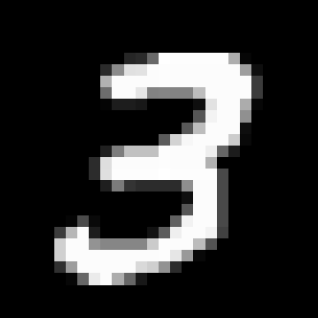

In [26]:
cv2_imshow(input_test_image)

In [27]:
input_test_image.shape

(318, 318, 3)

In [28]:
grayscale = cv2.cvtColor(input_test_image, cv2.COLOR_RGB2GRAY)

In [29]:
grayscale.shape

(318, 318)

In [30]:
input_test_image_resize = cv2.resize(grayscale, (28,28))
input_test_image_resize.shape

(28, 28)

In [31]:
cv2_imshow(input_test_image_resize)

In [32]:
input_test_image_resize = input_test_image_resize/255

In [33]:
image_reshape = np.reshape(input_test_image_resize, (1,28,28))

In [34]:
type(image_reshape)

numpy.ndarray

In [35]:
input_prediction = model.predict(image_reshape)
input_prediction

array([[5.9389083e-10, 9.4131142e-02, 1.9494593e-03, 1.0000000e+00,
        4.7541544e-08, 6.3185507e-01, 2.8182675e-13, 2.7394295e-04,
        9.5208365e-01, 4.5282638e-01]], dtype=float32)

In [36]:
predict_input_label = np.argmax(input_prediction)
predict_input_label

3

**All code Done in the one cell for predictive system**

Give test image path/content/download2121.png


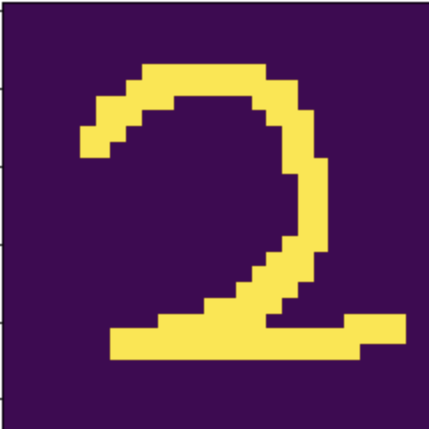

The predicted image is :  2


In [37]:
test_input_image_path = input('Give test image path')
test_input_image = cv2.imread(test_input_image_path)
cv2_imshow(test_input_image)
grayscale = cv2.cvtColor(test_input_image, cv2.COLOR_RGB2GRAY)
test_input_image_resize = cv2.resize(grayscale, (28,28))
test_input_image_resize = test_input_image_resize/255
input_image_reshape = np.reshape(test_input_image_resize, (1,28,28))
test_input_prediction = model.predict(input_image_reshape)
test_predict_input_label = np.argmax(test_input_prediction)
print('The predicted image is : ', test_predict_input_label)